In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

- Construir Método de Newton Raphson
- Construir Método de Secante
- Construir Método de Posición Falsa (Regla Falsa Regula falsi)

In [ ]:
#Clase pasada
def biseccion(f,a,b,tol):
    if f(a)*f(b)>=0:
        return 'Error f(a) y f(b) deben tener signo contrario'

    p=(a+b)/2

    n=0

    while abs(f(p))>tol:

        if f(a)*f(p)<0:
            b=p
        if f(p)*f(b)<0:
            a=p

        p=(a+b)/2
        n+=1

    print('Raiz encontrada en ', n,' iteraciones')

    return p


def punto_fijo(f,p0,Nmax):
    def g(x):
        return f(x) + x

    n=0
    p=p0

    while n<Nmax:
        p=g(p)
        n+=1

    return p

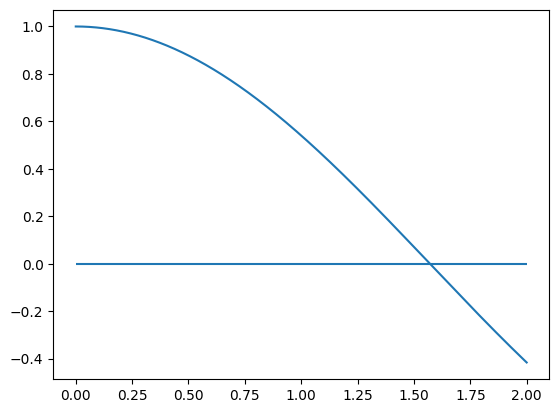

In [ ]:
def f(x):
    return np.cos(x)

def df(x):
    return -np.sin(x)

xmin=0
xmax=2
x=np.linspace(xmin,xmax,1000)

plt.plot(x,f(x))
plt.hlines(0,xmin,xmax)

# Método de Newton-Raphson (Newton)
<img src="nr.png" alt="drawing" width="500"/>

#### Algoritmo
0. Semillas $f(x), p_0$


1. Derivar $f(x)$ ...... $f'(x)=\frac{df}{dx}$


2. $p_n=p_{n-1} -\frac{f(p_{n-1})}{f'(p_{n-1})}$


3. Repetir hasta que se cumpla alguna:
$$|f(p)|<Tolerancia\approx 0 \checkmark$$

$$N_{iter}=N_{max}$$

$$|p_n-p_{n-1}|<Resolucion\approx 0$$

$$\frac{|p_n-p_{n-1}|}{|p_n|}< Resolución \%$$

# Cuidado con la convergencia
<img src="nr2.png" alt="drawing" width="500"/>

#### Capítulo 2: Burden - Numerical analysis

In [ ]:
def newton_raphson(f,df,x0,tol):
  xn=x0
  n=0
  while abs(f(xn))>tol:
    xn=xn-f(xn)/df(xn)
    n+=1
  print('Raiz encontrada en',n,'iteraciones')

  return xn

In [ ]:
def f(x):
    return np.cos(x)

def df(x):
    return -np.sin(x)

tolnr=1e-15
rootnr=newton_raphson(f,df,1,tolnr)
print(rootnr)

Raiz encontrada en 4 iteraciones
1.5707963267948966


# Método de Secante
<img src="sec1.png" alt="drawing" width="500"/>

#### Algoritmo
0. Semillas $f(x), p_0, p_1$


1. $p_2=p_1-\frac{f(p_1)(p_1 - p_0)}{f(p_1)-f(p_0)}$


2. $p_n=p_{n-1}-\frac{f(p_{n-1})(p_{n-1} - p_{n-2})}{f(p_{n-1})-f(p_{n-2})}$


3. Repetir hasta que se cumpla alguna:
$$|f(p)|<Tolerancia\approx 0  $$

$$N_{iter}=N_{max}$$

$$|p_n-p_{n-1}|<Resolucion\approx 0 \checkmark$$

$$\frac{|p_n-p_{n-1}|}{|p_n|}< Resolución \%$$


# Cuidado con la convergencia

$f(p_{n-1}) \neq f(p_{n-2})$

In [ ]:
def secante(f,p0,p1,tol):

  pn=p1-f(p1)*(p1-p0)/(f(p1)-f(p0))
  n=2
  while abs(f(pn))>tol:
    p0=p1
    p1=pn
    pn=p1-f(p1)*(p1-p0)/(f(p1)-f(p0))
    n+=1

  print('Raiz encontrada en',n,'iteraciones')

  return pn

In [ ]:
tolsec=1e-15
rootsec=secante(f,1,2,tolsec)
print(rootsec)

Raiz encontrada en 5 iteraciones
1.5707963267948966


# Método de Posición falsa (Regla Falsa o Regula Falsi)

Combina el método de la secante con el método de bisección

<img src="regfal1.png" alt="drawing" width="500"/>

#### Algoritmo
0. Semillas $f(x), a, b$


1. Check $f(a)f(b) < 0$


2. $p=b-\frac{f(b)(b-a)}{f(b)-f(a)}$


3. Si $f(a)f(p)<0$ entonces $b=p$


4. Si $f(p)f(b)<0$ entonces $a=p$


5. Repetir hasta que se cumpla alguna:
$$|f(p)|<Tolerancia\approx 0   $$

$$N_{iter}=N_{max}$$

$$|p_n-p_{n-1}|<Resolucion\approx 0 \checkmark$$

$$\frac{|p_n-p_{n-1}|}{|p_n|}< Resolución \%$$

# Revisar:
https://nbviewer.jupyter.org/github/sbustamante/ComputationalMethods/blob/master/material/one-variable-equations.ipynb

#### Reto:  Actividad lentes gravitacionales
#### Reto:  Kepler por cada uno de los métodos ¿Es posible?